# ASSIGNMENT: DECISION TREE FRAUD

Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [155]:
#load the libraries
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,accuracy_score,r2_score
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
import seaborn as sns
from sklearn.tree import plot_tree
import pandas_profiling as pp
import sweetviz as sv

In [156]:
#load Dataset
fraud = pd.read_csv("Fraud_check.csv")
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# EDA

Check the various attributes of data like shape(rows and cols),columns,datatypes

In [157]:
# data structure number of rows and columns
fraud.shape

(600, 6)

In [158]:
# data types
fraud.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [159]:
# data type conversion
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


The data information to know how many missing values available in the dataset. 
There are 5 total columns and 600 rows are there, Also there are 2 type of datatypes available int64 and object.
Insort, 3 feature are int64 and 3 feature are object type of data 
The second column is represents the number of not-null type of data. It means there are no any missing values in the dataset.

In [160]:
# Lets check distribution of every column with help of describe fuction
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


We can clearly seen that what are the min, median, std, max and 25%, 50%, 75% values.

# BOXPLOT

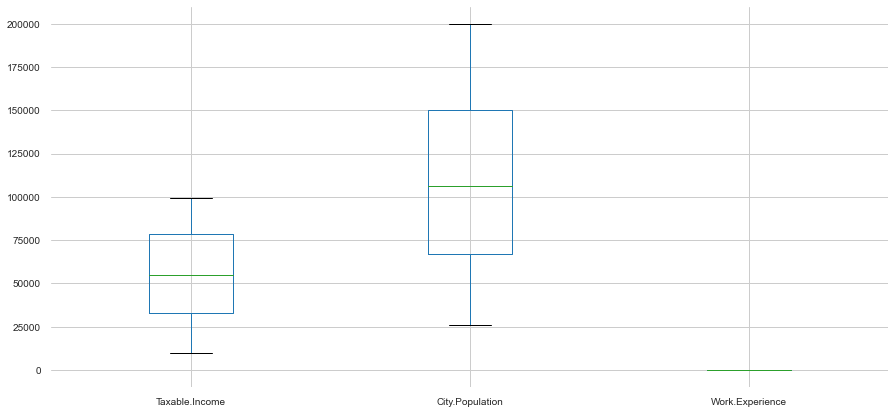

In [161]:
# Visulazing the distibution of the data for every feature
fraud.boxplot(figsize=(15, 7))
plt.show();

### box plot we can understand that there are No outliers.taxable_income is slightly left skewed goes upto 1 lacs with a median approx of 54k with range of majority data is between 27k to 79k.city_population is Right skewed, goes upto 2 lakh with median approx of 1 lakh 10 thousand with range of majority data is between 72k to 1 lac 50 thausand .

# count plot on single categorical variable

<AxesSubplot:xlabel='Urban', ylabel='count'>

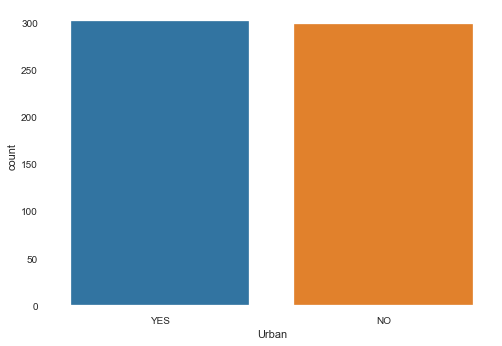

In [162]:
# count plot on single categorical variable
sns.countplot(x ='Urban', data = fraud)

<AxesSubplot:xlabel='Undergrad', ylabel='count'>

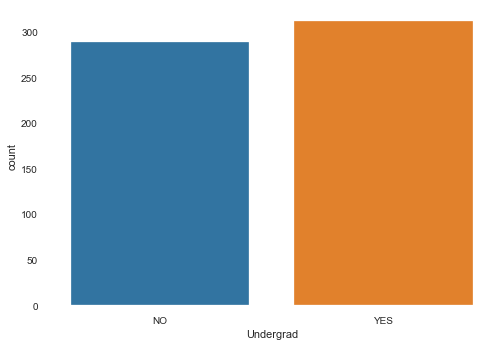

In [163]:
# count plot on single categorical variable
sns.countplot(x ='Undergrad', data = fraud)

<AxesSubplot:xlabel='Marital.Status', ylabel='count'>

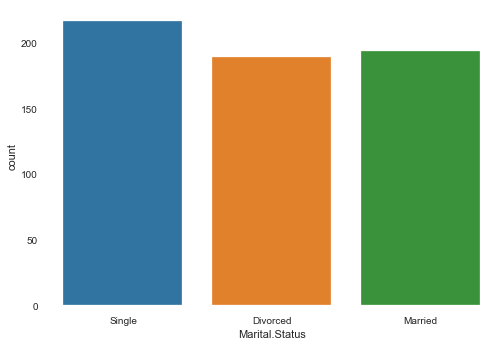

In [164]:
sns.countplot(x ='Marital.Status', data = fraud)

##### Blue indicates the Single, Orange indicates the Divorced and Green indicates the Married. It is observed that single cases are more in the city and this can be assumed as students are grauating or completing their studies and becoming financially independent while married ones are staying in the city with their family as they working over here and divorced cases are also slightly more.

In [165]:
fraud.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


### multicolinearity by corr function no relationship between columns

In [166]:
# SKEWNESS
#Skewness measures the asymmetry of a distribution.
fraud.skew()
#the skeweness of all columns are very low to treat.so we can neglect it

C:\Users\Anup sharma\AppData\Local\Temp\ipykernel_204\3958311508.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  fraud.skew()


Taxable.Income     0.030015
City.Population    0.125009
Work.Experience    0.018529
dtype: float64

In [167]:
#Kurtosis measures the heaviness of a distribution's tails relative to a normal distribution.
fraud.kurtosis()

C:\Users\Anup sharma\AppData\Local\Temp\ipykernel_204\3650214945.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  fraud.kurtosis()


Taxable.Income    -1.199782
City.Population   -1.120154
Work.Experience   -1.167524
dtype: float64

In [168]:
#Duplicates
#count of duplicated rows
fraud[fraud.duplicated()].shape

(0, 6)

# Converting target variable to categorical data

In [169]:
#def filt to assign fraud risky and best value
# less than equal to or numpy mean
def filt(x):
    if x<=30000:
        return 'Bad'
    else:
        return 'Good'

In [170]:
#remove last element from the list pop
fraud['fraudd'] = fraud['Taxable.Income'].copy()
fraud['fraudd'] = fraud['fraudd'].apply(filt)
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,fraudd
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


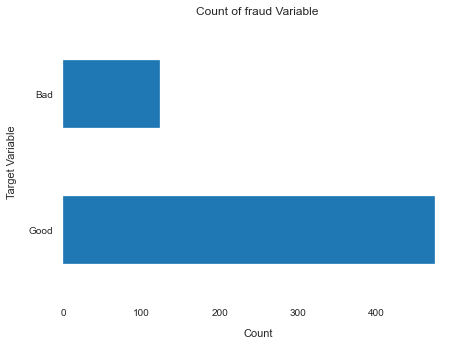

In [171]:
#labelpad : This parameter is the spacing in points from the axes bounding box including ticks and tick labels.
#The plot.barh() function is used to make a horizontal bar plot.
fraud['fraudd'].value_counts().plot(kind='barh', figsize=(7,5))
plt.xlabel("Count", labelpad=11)
plt.ylabel("Target Variable", labelpad=11)
plt.title("Count of fraud Variable ", y=1.02);

In [172]:
100*fraud['fraudd'].value_counts()/len(fraud['fraudd'])

Good    79.333333
Bad     20.666667
Name: fraudd, dtype: float64

Data is highly imbalanced, ratio = 79:21.So we analyse the data with other features while taking the target values separately to get some insights.

<AxesSubplot:xlabel='fraudd', ylabel='count'>

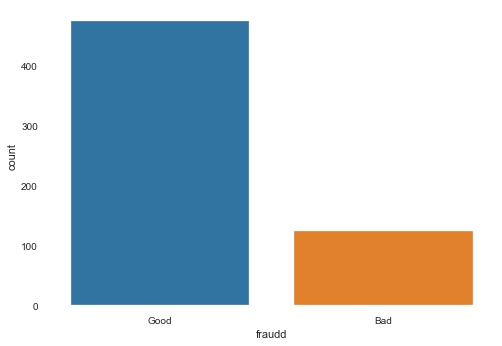

In [173]:
sns.countplot(x ='fraudd', data = fraud)

company dataset in fraudd columns is Good is High and Bad is low.

# LABEL ENCODER

In [174]:
#LABEL ENCODER
label_encoder= preprocessing.LabelEncoder()
fraud['fraudd']= label_encoder.fit_transform(fraud['fraudd'])
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,fraudd
0,NO,Single,68833,50047,10,YES,1
1,YES,Divorced,33700,134075,18,YES,1
2,NO,Married,36925,160205,30,YES,1
3,YES,Single,50190,193264,15,YES,1
4,NO,Married,81002,27533,28,NO,1
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,1
596,YES,Divorced,69967,55369,2,YES,1
597,NO,Divorced,47334,154058,0,YES,1
598,YES,Married,98592,180083,17,NO,1


# One-Hot Encoding

In [175]:
# One-Hot Encoding of categrical variables
fraud=pd.get_dummies(fraud,columns=['Urban','Undergrad','Marital.Status'])
fraud

,Taxable.Income,City.Population,Work.Experience,fraudd,Urban_NO,Urban_YES,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,68833,50047,10,1,0,1,1,0,0,0,1
1,33700,134075,18,1,0,1,0,1,1,0,0
2,36925,160205,30,1,0,1,1,0,0,1,0
3,50190,193264,15,1,0,1,0,1,0,0,1
4,81002,27533,28,1,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,1,0,1,1,0,0
596,69967,55369,2,1,0,1,0,1,1,0,0
597,47334,154058,0,1,0,1,1,0,1,0,0
598,98592,180083,17,1,1,0,0,1,0,1,0


#### One-Hot encoding is a technique used to convert categorical data into numeric data by assigning a unique integer value to each category.

# Data Transformation

In [176]:
#correlation 
fraud.corr()

,Taxable.Income,City.Population,Work.Experience,fraudd,Urban_NO,Urban_YES,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
Taxable.Income,1.000000,-0.064387,-0.001818,0.688725,-0.070628,0.070628,0.049232,-0.049232,0.062099,-0.100611,0.037910
City.Population,-0.064387,1.000000,0.013135,-0.012225,0.040098,-0.040098,-0.079579,0.079579,0.004925,-0.007035,0.002087
Work.Experience,-0.001818,0.013135,1.000000,0.001972,0.094559,-0.094559,0.005362,-0.005362,-0.014833,0.033347,-0.018123
fraudd,0.688725,-0.012225,0.001972,1.000000,0.004830,-0.004830,0.012523,-0.012523,0.027115,-0.043178,0.015820
Urban_NO,-0.070628,0.040098,0.094559,0.004830,1.000000,-1.000000,-0.000267,0.000267,0.065518,-0.016771,-0.047014
Urban_YES,0.070628,-0.040098,-0.094559,-0.004830,-1.000000,1.000000,0.000267,-0.000267,-0.065518,0.016771,0.047014
Undergrad_NO,0.049232,-0.079579,0.005362,0.012523,-0.000267,0.000267,1.000000,-1.000000,0.045101,-0.015120,-0.028883
Undergrad_YES,-0.049232,0.079579,-0.005362,-0.012523,0.000267,-0.000267,-1.000000,1.000000,-0.045101,0.015120,0.028883
Marital.Status_Divorced,0.062099,0.004925,-0.014833,0.027115,0.065518,-0.065518,0.045101,-0.045101,1.000000,-0.468757,-0.510435
Marital.Status_Married,-0.100611,-0.007035,0.033347,-0.043178,-0.016771,0.016771,-0.015120,0.015120,-0.468757,1.000000,-0.520317


In [177]:
#null values and the data types
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Taxable.Income           600 non-null    int64
 1   City.Population          600 non-null    int64
 2   Work.Experience          600 non-null    int64
 3   fraudd                   600 non-null    int32
 4   Urban_NO                 600 non-null    uint8
 5   Urban_YES                600 non-null    uint8
 6   Undergrad_NO             600 non-null    uint8
 7   Undergrad_YES            600 non-null    uint8
 8   Marital.Status_Divorced  600 non-null    uint8
 9   Marital.Status_Married   600 non-null    uint8
 10  Marital.Status_Single    600 non-null    uint8
dtypes: int32(1), int64(3), uint8(7)
memory usage: 20.6 KB


No Missing values and data types 

In [178]:
#finding null values
fraud.isnull().sum()

Taxable.Income             0
City.Population            0
Work.Experience            0
fraudd                     0
Urban_NO                   0
Urban_YES                  0
Undergrad_NO               0
Undergrad_YES              0
Marital.Status_Divorced    0
Marital.Status_Married     0
Marital.Status_Single      0
dtype: int64

<AxesSubplot:>

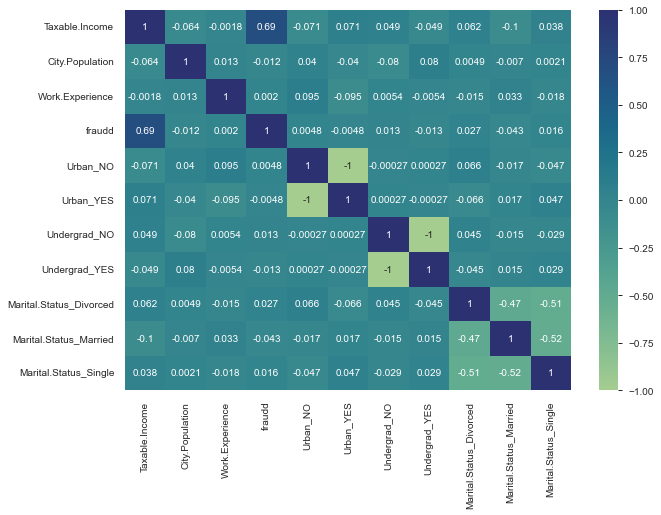

In [179]:
# HEATMAP CORRELATION
plt.figure(figsize=(10,7))
sns.heatmap(fraud.corr(),cmap="crest",annot=True)

heatmap,The lighter color shows the higher cor-relation betweem two variables and the darker color has less relation ship.

In [180]:
fraud1=fraud.drop(['Taxable.Income'],axis=1)

In [181]:
fraud1

,City.Population,Work.Experience,fraudd,Urban_NO,Urban_YES,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,50047,10,1,0,1,1,0,0,0,1
1,134075,18,1,0,1,0,1,1,0,0
2,160205,30,1,0,1,1,0,0,1,0
3,193264,15,1,0,1,0,1,0,0,1
4,27533,28,1,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,39492,7,1,0,1,0,1,1,0,0
596,55369,2,1,0,1,0,1,1,0,0
597,154058,0,1,0,1,1,0,1,0,0
598,180083,17,1,1,0,0,1,0,1,0


# Train and Test Split data

In [182]:
#Train and Test Split data
x=pd.concat([fraud1.iloc[:,0:2],fraud1.iloc[:,3:]],axis=1)
y=fraud1.iloc[:,2]

In [183]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: fraudd, Length: 600, dtype: int32

In [184]:
#splitting data into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)
x_train

,City.Population,Work.Experience,Urban_NO,Urban_YES,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
381,61920,4,1,0,1,0,0,0,1
4,27533,28,1,0,1,0,0,1,0
86,97520,29,0,1,0,1,1,0,0
83,73963,18,0,1,1,0,1,0,0
523,42198,12,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
57,70744,13,1,0,1,0,0,0,1
201,58225,27,0,1,0,1,1,0,0
578,185339,6,1,0,1,0,1,0,0
391,29934,1,1,0,1,0,0,1,0


#### create the independent and dependent feature, then split them into train and test data where training size is 80%. Later we collect all the numerical features 

# Building Decision Tree Classifier using Entropy Criteria

 Decision tree classifier with maximum depth as 3 and fitting the model

In [185]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3,random_state=33)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=33)

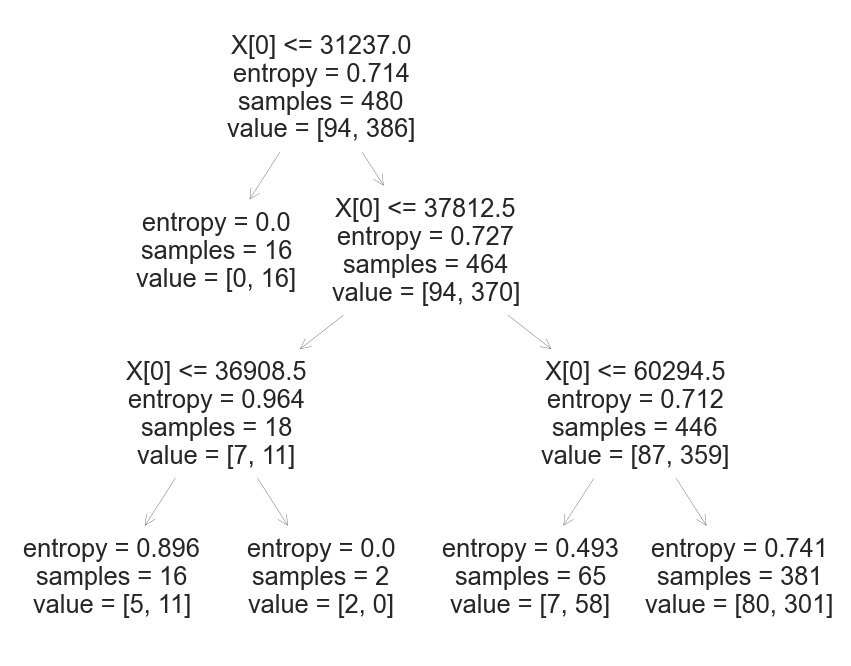

In [186]:
# plot the decision tree
plt.figure(figsize=(15,12))
tree.plot_tree(model);

In [187]:
y_train.value_counts()

1    386
0     94
Name: fraudd, dtype: int64

# Visualization for decision tree

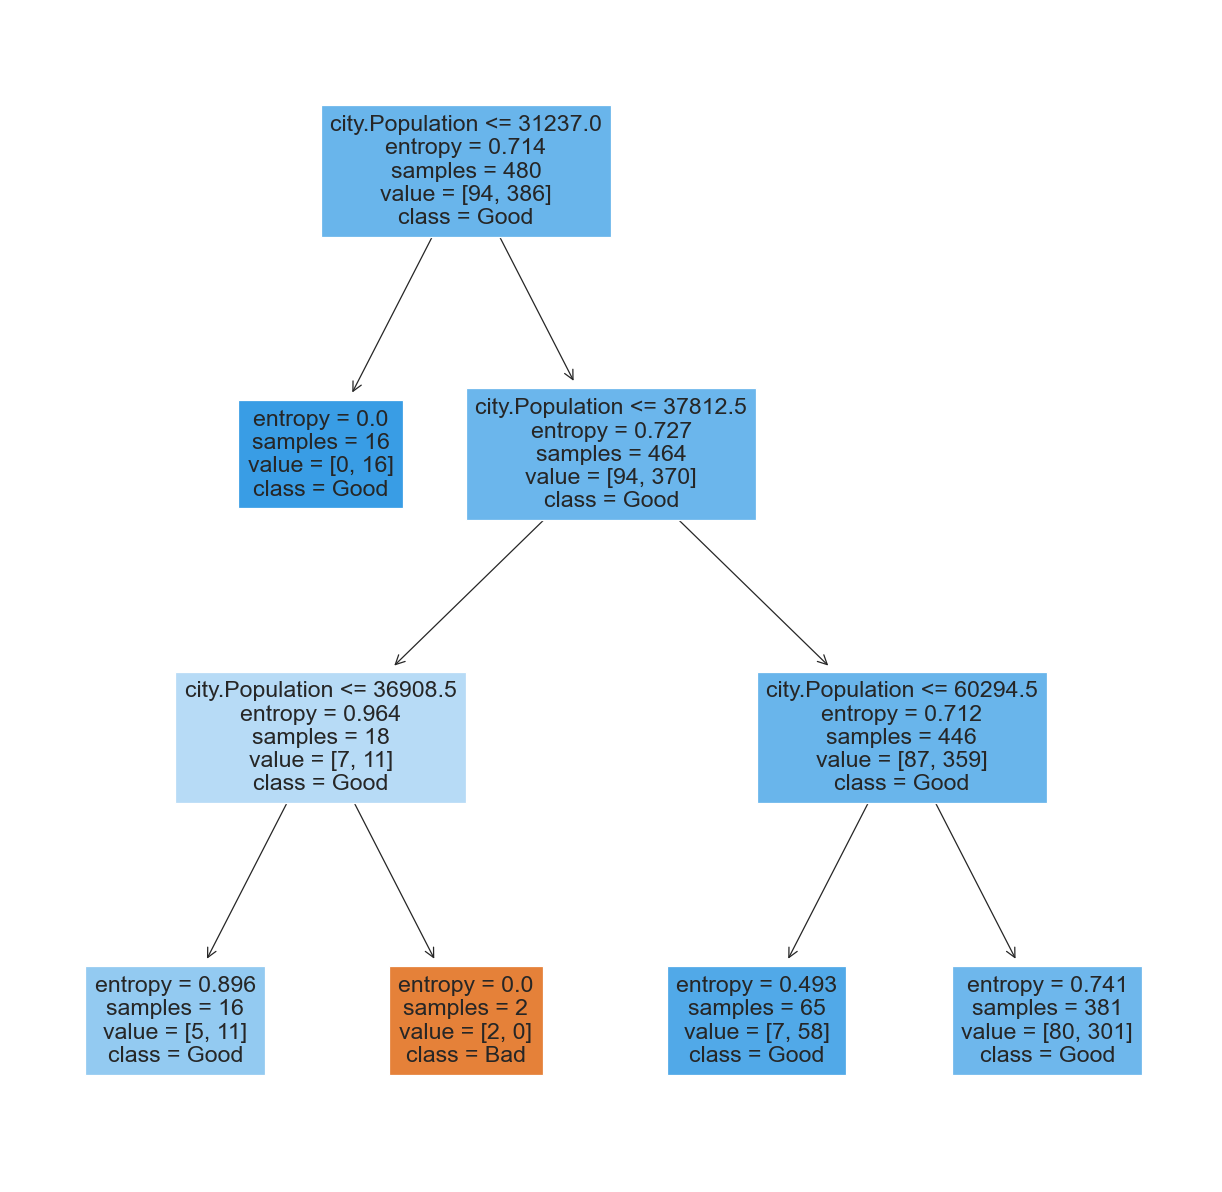

In [188]:
fn=['city.Population','Urban_NO','Urban_YES','Work.Experience','Undergrad_NO','Undergrad_YES','Marital.Status_Divorced','Marital.Status_Married','Marital.Status_Single']
cn=['Bad','Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [189]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 

In [190]:
# Accuracy 
np.mean(preds==y_test)

0.7416666666666667

# Building Decision Tree Classifier (CART) using Gini Criteria

In [191]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [192]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [193]:
model_gini.score(x_train, y_train)

0.8083333333333333

In [194]:
model_gini.score(x_test,y_test)

0.7416666666666667

In [195]:
#Prediction and computing the accuracy
pred=model_gini.predict(x_test)
np.mean(pred==y_test)

0.7416666666666667

# HYPER PARAMETER TUNING 

# Grid Search

 Apply Grid Search on Decision Tree Classifier to hypertune parameters.

In [196]:
#Parameter grid
parameter_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "criterion": ["gini", "entropy"]}

In [197]:
#Grid Search
clf=DecisionTreeClassifier (random_state=33)
grid_search = GridSearchCV(clf, param_grid=parameter_grid)
grid_search.fit(x_train, y_train)

D:\anacdona\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anacdona\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anacdona\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "D:\anacdona\lib\site-packages\sklearn\tree\_classes.py", line 308, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn(some_fits_failed_me

GridSearchCV(estimator=DecisionTreeClassifier(random_state=33),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None], 'max_features': [1, 3, 10],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10]})

In [198]:
# print("Training score: %.2f " % GS_score)
score_gs=grid_search.score(x_test,y_test)
print("Testing score: %.2f " % score_gs)

Testing score: 0.75 


# Randomised Search

Apply Randomized Search on Decision Tree Classifier to hypertune parameters.

In [199]:
#Parameter grid
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "criterion": ["gini", "entropy"]}


In [200]:
#Randomised Search
clf1=DecisionTreeClassifier (random_state=33)

In [201]:
# n_iter_search = 20
from sklearn.model_selection import RandomizedSearchCV
decision_search = RandomizedSearchCV(clf1, param_distributions=param_grid,
                                   n_iter=20)

In [202]:
decision_search.fit(x_train, y_train)

D:\anacdona\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
35 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anacdona\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anacdona\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "D:\anacdona\lib\site-packages\sklearn\tree\_classes.py", line 308, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn(some_fits_failed_mess

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=33), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': [1, 3, 10],
                                        'min_samples_leaf': [1, 3, 10],
                                        'min_samples_split': [2, 3, 10]})

In [203]:
score_rs=decision_search.score(x_test,y_test)
print("Testing score: %.2f " % score_rs)

Testing score: 0.75 
